# What is a Neural Network
So, what are these magical things that have been beating chess grandmasters, driving cars, detecting cancer cells and winning video games?

A deep neural network is a layered representation of data. The term "deep" refers to the presence of multiple layers. Recall that in our core learning algorithms (like linear regression) data was not transformed or modified within the model, it simply existed in one layer. We passed some features to our model, some math was done, an answer was returned. The data was not changed or transformed throughout this process. A neural network processes our data differently. It attempts to represent our data in different ways and in different dimensions by applying specific operations to transform our data at each layer. Another way to express this is that at each layer our data is transformed in order to learn more about it. By performing these transformations, the model can better understand our data and therefore provide a better prediction.

# Creating a Neural Network

In [27]:
#%tensorflow_version 2.x  # this line is not required unless you are in a notebook
# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# DataSet

In [28]:
fashion_mnist = keras.datasets.fashion_mnist  # load dataset

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()  # split into tetsing and training sets

In [29]:
#Let's have a look at this data to see what we are working with.
train_images.shape,test_images.shape
#So we've got 60,000 images that are made up of 28x28 pixels (784 in total).

((60000, 28, 28), (10000, 28, 28))

In [30]:
train_images[0,21,21]  # let's have a look at one pixel
#Our pixel values are between 0 and 255, 0 being black and 255 being white. This means we have a grayscale image as there are no color channels.

181

In [31]:
train_labels[:10]  # let's have a look at the first 10 training labels

array([9, 0, 0, 3, 0, 2, 7, 2, 5, 5], dtype=uint8)

In [32]:
#train_labels[:10]  # let's have a look at the first 10 training labels
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']


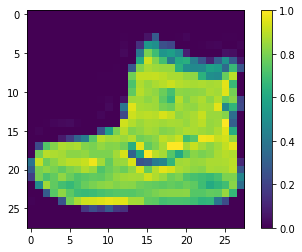

In [53]:
#Fianlly let's look at what some of these images look like!
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()


# Data Preprocessing
The last step before creating our model is to preprocess our data. This simply means applying some prior transformations to our data before feeding it the model. In this case we will simply scale all our greyscale pixel values (0-255) to be between 0 and 1. We can do this by dividing each value in the training and testing sets by 255.0. We do this because smaller values will make it easier for the model to process our values.

In [36]:
train_images = train_images / 255.0

test_images = test_images / 255.0

# Building the Model
Now it's time to build the model! We are going to use a keras sequential model with three different layers. This model represents a feed-forward neural network (one that passes values from left to right). We'll break down each layer and its architecture below.

In [37]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),  # input layer (1) # put them on 1 line of all the inputs
    keras.layers.Dense(128, activation='relu'),  # hidden layer (2)#making neurons or hidden layers
    keras.layers.Dense(10, activation='softmax') # output layer (3)#softmax is just a activation functiom to keep our value in b/w 0 and 1
])

Layer 1: This is our input layer and it will conist of 784 neurons. We use the flatten layer with an input shape of (28,28) to denote that our input should come in in that shape. The flatten means that our layer will reshape the shape (28,28) array into a vector of 784 neurons so that each pixel will be associated with one neuron.

Layer 2: This is our first and only hidden layer. The dense denotes that this layer will be fully connected and each neuron from the previous layer connects to each neuron of this layer. It has 128 neurons and uses the rectify linear unit activation function.(relu)

Layer 3: This is our output later and is also a dense layer. It has 10 neurons that we will look at to determine our models output. Each neuron represnts the probabillity of a given image being one of the 10 different classes. The activation function softmax is used on this layer to calculate a probabillity distribution for each class. This means the value of any neuron in this layer will be between 0 and 1, where 1 represents a high probabillity of the image being that class.

# Compile the Model
The last step in building the model is to define the loss function, optimizer and metrics we would like to track. 

In [38]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Training the Model
Now it's finally time to train the model. Since we've already done all the work on our data this step is as easy as calling a single method.

In [63]:
model.fit(train_images, train_labels, epochs=25)  # we pass the data, labels and epochs and watch the magic!
#An epoch means training the neural network with all the training data for one cycle. In an epoch, we use all of the data exactly once. A forward pass and a backward pass together are counted as one pass:



Epoch 1/25
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1953 - accuracy: 0.9263
Epoch 2/25
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1914 - accuracy: 0.9287
Epoch 3/25
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1852 - accuracy: 0.9302
Epoch 4/25
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1809 - accuracy: 0.9319
Epoch 5/25
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1770 - accuracy: 0.9322
Epoch 6/25
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1720 - accuracy: 0.9352
Epoch 7/25
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1681 - accuracy: 0.9374
Epoch 8/25
1875/1875 [==============================] - 5s 2ms/step - loss: 0.1640 - accuracy: 0.9388
Epoch 9/25
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1612 - accuracy: 0.9397
Epoch 10/25
1875/1875 [==============================] - 4s 2ms/step - loss: 0.156

# Evaluating the Model
Now it's time to test/evaluate the model. We can do this quite easily using another builtin method from keras.

The verbose argument is defined from the keras documentation as: "verbose: 0 or 1. Verbosity mode. 0 = silent, 1 = progress bar."

In [64]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=1) 

print('Test accuracy:', test_acc)

313/313 [==============================] - 1s 2ms/step - loss: 0.4438 - accuracy: 0.8884
Test accuracy: 0.8884000182151794


# Making Predictions
To make predictions we simply need to pass an array of data in the form we've specified in the input layer to .predict() method.

In [65]:
predictions = model.predict(test_images)
print(predictions)#this method returns to us an array of predictions for each image we passed it. Let's have a look at the predictions for image 1.

[[3.87823670e-16 7.15889500e-18 6.80096687e-15 ... 6.08831397e-05
  1.22308590e-13 9.99939084e-01]
 [1.31155082e-06 1.35775396e-26 9.99955893e-01 ... 2.08869418e-16
  1.17922674e-20 1.87308955e-35]
 [1.21940432e-26 1.00000000e+00 1.14645668e-24 ... 0.00000000e+00
  2.28787049e-30 0.00000000e+00]
 ...
 [2.73505607e-10 3.53138736e-25 1.65178040e-08 ... 1.20536406e-25
  1.00000000e+00 2.26232775e-31]
 [6.17730533e-20 1.00000000e+00 2.18142956e-21 ... 1.14742973e-36
  1.32919548e-20 1.34926986e-24]
 [2.56686464e-13 1.98935865e-16 1.09381297e-12 ... 8.71312444e-09
  8.95021668e-10 9.85007838e-15]]


In [68]:
#If we wan't to get the value with the highest score we can use a useful function from numpy called argmax(). This simply returns the index of the maximium value from a numpy array.
np.argmax(predictions)

21

In [69]:
#And we can check if this is correct by looking at the value of the cooresponding test label.
test_labels

array([9, 2, 1, ..., 8, 1, 5], dtype=uint8)

Pick a number: 23


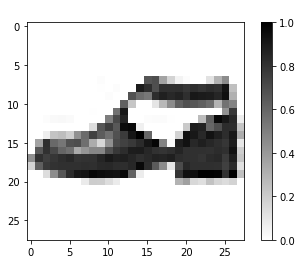

In [70]:

#To see the expecteed and guess values
COLOR = 'white'
plt.rcParams['text.color'] = COLOR
plt.rcParams['axes.labelcolor'] = COLOR

def predict(model, image, correct_label):
  class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
  prediction = model.predict(np.array([image]))
  predicted_class = class_names[np.argmax(prediction)]

  return show_image(image, class_names[correct_label], predicted_class)


def show_image(img, label, guess):
  plt.figure()
  plt.imshow(img, cmap=plt.cm.binary)
  plt.title("Excpected: " + label)
  plt.xlabel("Guess: " + guess)
  plt.colorbar()
  plt.grid(False)
  plt.show()


def get_number():
  while True:
    num = input("Pick a number: ")
    if num.isdigit():
      num = int(num)
      if 0 <= num <= 1000:
        return int(num)
    else:
      print("Try again...")

num = get_number()
image = test_images[num]
label = test_labels[num]
predict(model, image, label)